In [10]:

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline 
from scipy.optimize import curve_fit
from scipy.stats import chi2

plt.style.use('default')
plt.rcParams["font.family"]='serif'
plt.rcParams["figure.figsize"][0] = 14
plt.rcParams["figure.figsize"][1] = 9
plt.rcParams['errorbar.capsize']=2

In [11]:
def linear(x, a, b):
    return (a*x+b)
def linear2(x, a):
    return (a*x)

Steigung a : 0.32503030302883074 +- 0.0025100349513216646
B:  0.0031013296991423893 +- 2.3949908263565216e-05


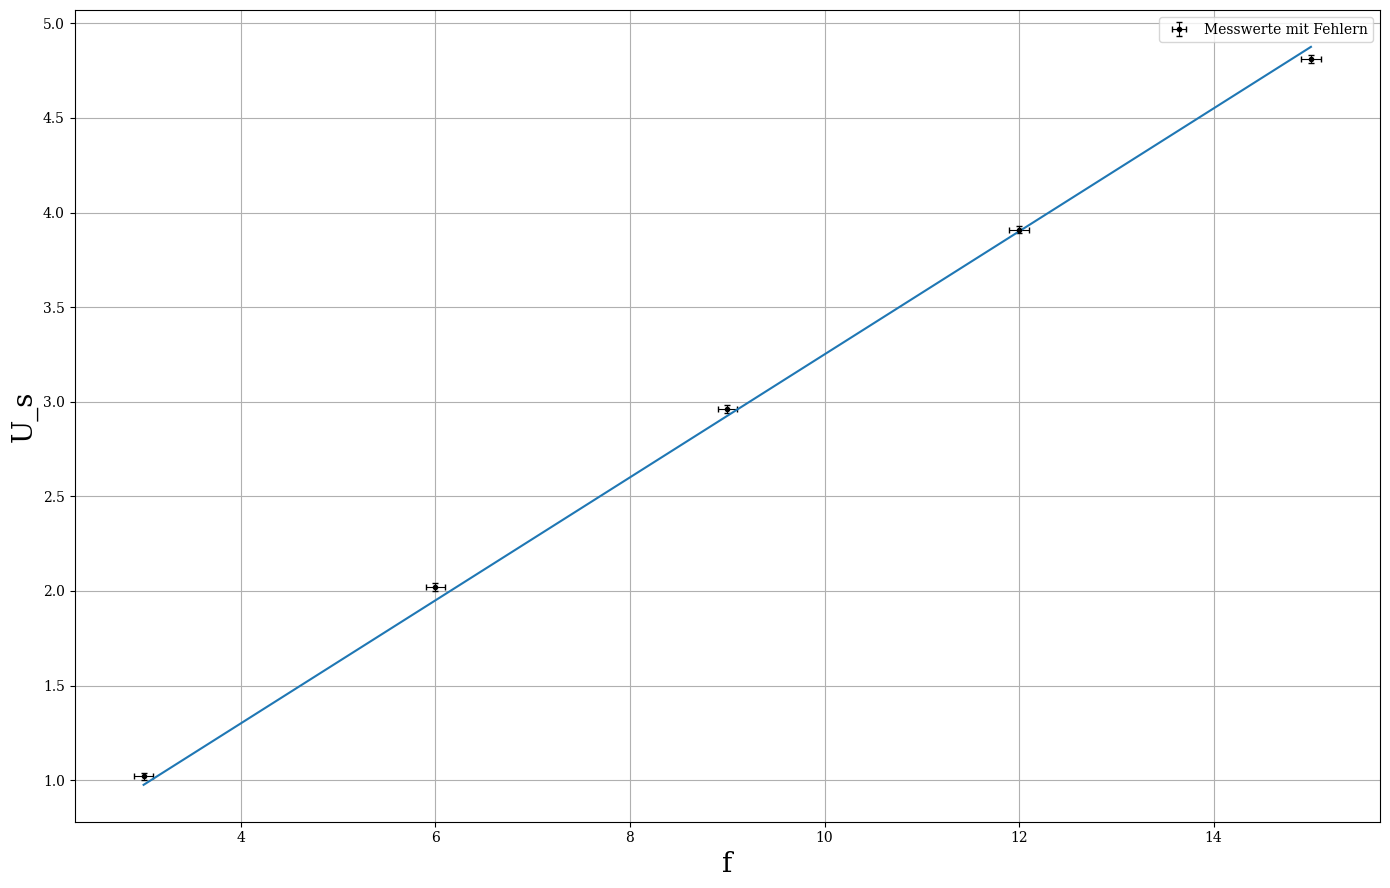

In [12]:
#Messung 1 Frequenz variieren
A= 41.7 * 10**-4 #m^2
N=4000
freq = np.array([3.0, 6.0, 9.0, 12.0, 15.0])
d_freq = np.full(5, 0.1)

Us = np.array([1.02, 2.02, 2.96, 3.91, 4.81])
d_Us = np.full(5, 0.02)

plt.errorbar(freq, Us, yerr=d_Us, xerr=d_freq, linewidth=0.8, linestyle='', marker='.', label='Messwerte mit Fehlern', color='black')
plt.legend()
plt.ylabel('U_s', size=20)
plt.xlabel('f', size=20)
plt.grid()
plt.tight_layout()

p, c = curve_fit(linear2, freq, Us, sigma=d_Us)
p_err = np.sqrt(np.diag(c))
plt.plot(freq, linear2(freq, p))
print('Steigung a :' , p[0], '+-', p_err[0])

#Berechnung von B
def B(a): 
    return (a /(A * N * 2 * np.pi))
def dB(da):
    return (da/(A * N * 2 * np.pi))
print('B: ', B(p[0]), '+-', dB(p_err[0]))
plt.savefig('Messung1.pdf', format='PDF')

Steigung a:  0.8495438596487946 +- 0.003274080938317212


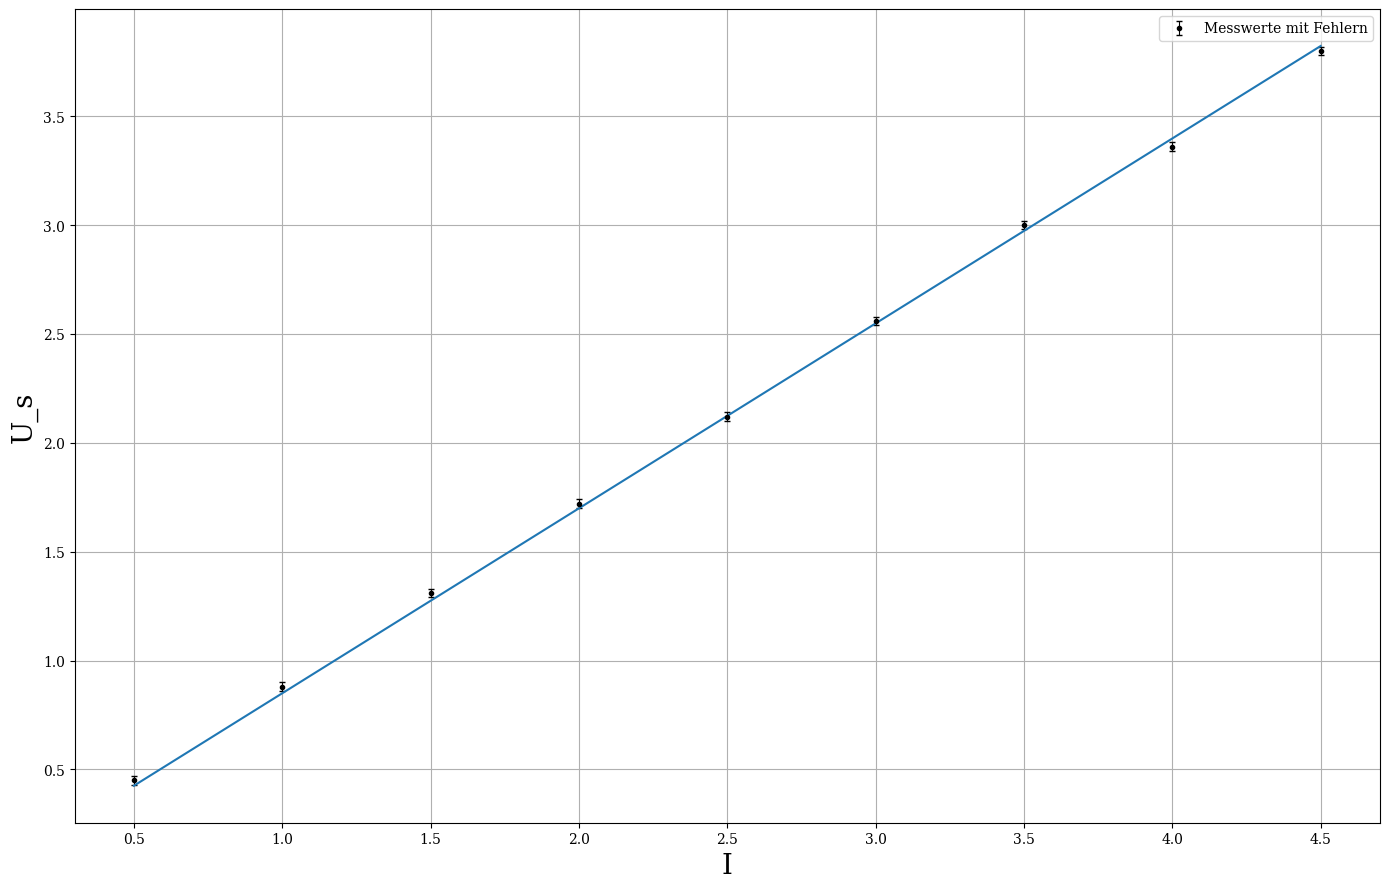

In [13]:
#Messung 2 
I = np.arange(0.5, 5, 0.5)
d_I = np.full(5, 0)

Us2 = np.array([0.45, 0.88, 1.31, 1.72, 2.12, 2.56, 3.00, 3.36, 3.80])
d_Us2 = np.full(9, 0.02)

plt.errorbar(I, Us2, yerr=d_Us2, linestyle='', marker='.',label='Messwerte mit Fehlern', color='black', linewidth = 0.8)
plt.ylabel('U_s', size=20)
plt.xlabel('I', size=20)
plt.grid()
plt.legend()
plt.tight_layout()

p2, c2 = curve_fit(linear2, I, Us2, sigma=d_Us2)
p2_err = np.sqrt(np.diag(c2))
plt.plot(I, linear2(I, p2))
print('Steigung a: ', p2[0], '+-', p2_err[0])
plt.savefig('Messung2.pdf', format='PDF')

In [14]:
#Theoretischen Werte
R = 295 * 10**-3
mü = 1.25663706212 * 10**-6
n = 124

def B_spule(I):
    return (4/5)**(3/2)*mü * n * I / R
B_t = B_spule(I)


sigma = np.abs(round(B(p[0]) - B_spule(4)/B(p[0]),2))
print('B Theo: ', B_spule(4), ', sigma:', sigma)

B Theo:  0.0015118353826681378 , sigma: 0.48


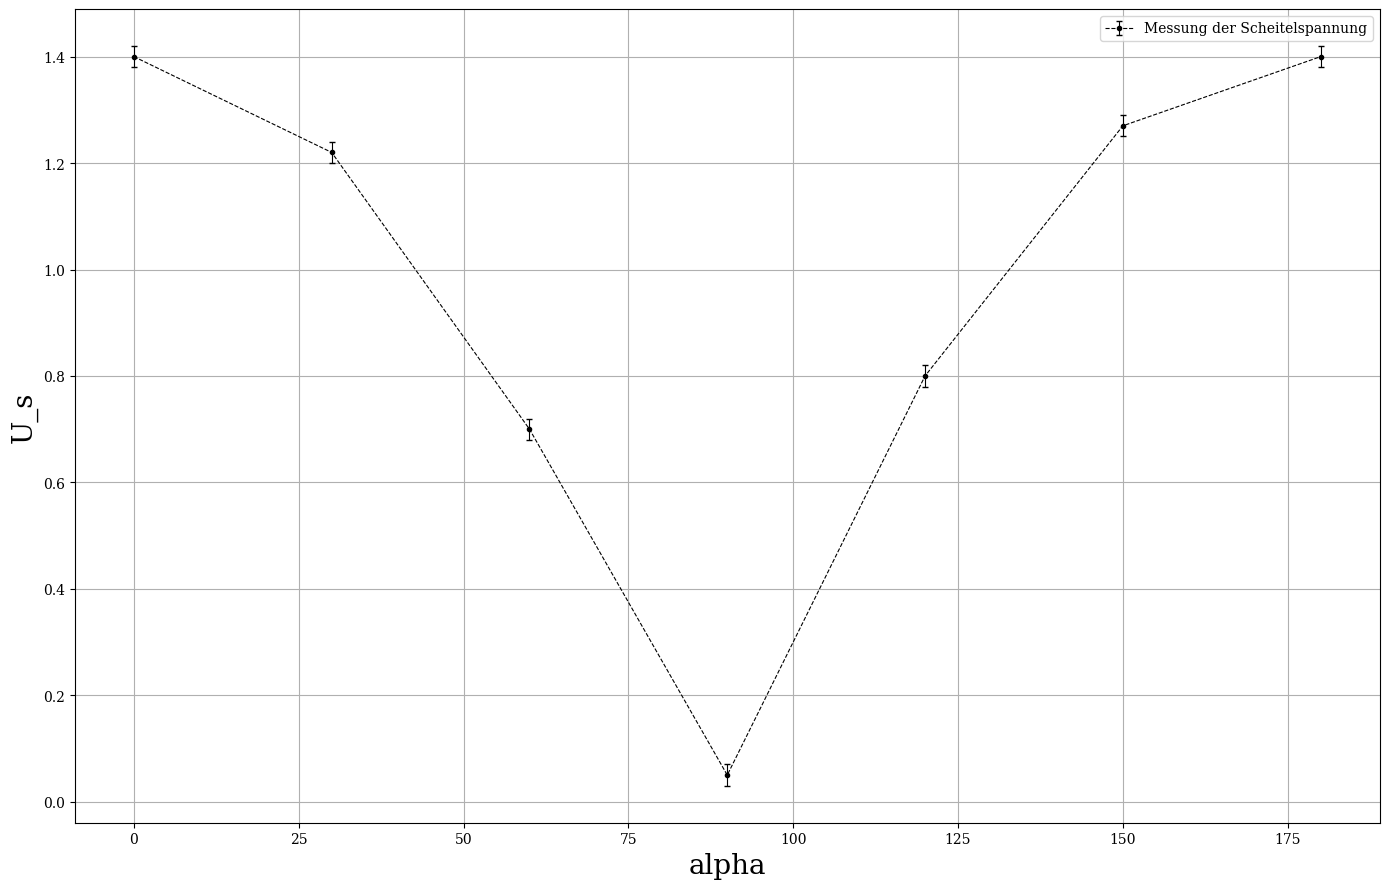

In [15]:
#Wechselstrom
winkel = np.arange(0,210, 30)
d_winkel = np.full(7, 0.1)

Us3 = np.array([1.4, 1.22, 0.7, 0.05, 0.8, 1.27, 1.40])
d_Us3 = np.full(7, 0.02)

plt.errorbar(winkel, Us3, yerr=d_Us3, color='black', linestyle='--', linewidth=0.8, marker='.', label='Messung der Scheitelspannung')
plt.ylabel('U_s', size=20)
plt.xlabel('alpha', size=20)
plt.grid()
plt.legend()
plt.tight_layout()
plt.savefig('Winkelabhängigkeit.pdf', format='PDF')


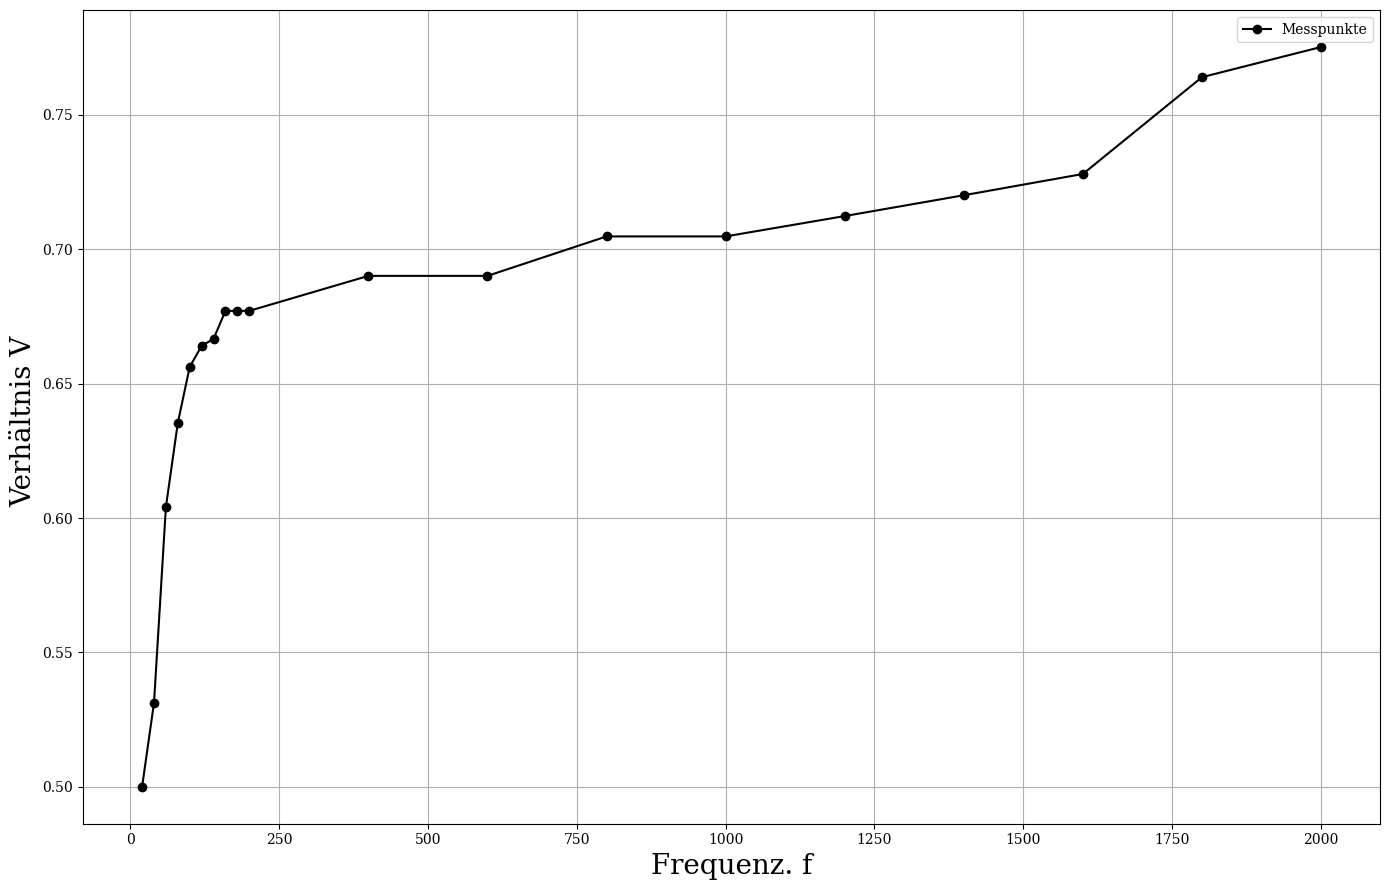

In [16]:
#unterschiedliche Freauenzen 
freq2 = np.concatenate((np.arange(20,200, 20), np.arange(200,2200, 200)))
d_freq2 = np.full(freq.size, 0.1)

Us4 = np.array([0.19, 0.204, 0.232, 0.244, 0.252, 0.255, 0.256, 0.26, 0.26, 0.26, 0.265, 0.265, 0.265, 0.265, 0.265, 0.265, 0.265, 0.272, 0.276])
d_Us4 = np.full(Us4.size, 0.002)

Uh = np.concatenate((np.array([0.38]), np.full(11, 0.384), np.array([0.376, 0.376, 0.372, 0.368, 0.364, 0.356, 0.356])))
d_Uh =  np.full(Uh.size, 0.002)    

Ih = np.array([0.556, 0.420, 0.318, 0.253, 0.207, 0.175, 0.153, 0.134, 0.119, 0.108, 0.054, 0.036, 0.026, 0.0210, 0.017, 0.014, 0.012, 0.010, 0.009])
d_Ih = np.full(Ih.size, 0.001)

#Verhältnis
vU = Us4 / Uh

#print(vU)
plt.plot(freq2, vU, 'black', marker='o', label='Messpunkte')
plt.ylabel('Verhältnis V ', size=20)
plt.xlabel('Frequenz. f', size=20)
plt.grid()
plt.legend()
plt.tight_layout()
plt.savefig('Verhältnis.pdf', format='PDF')

a:  0.019989502543576596 err: 0.0009002994046962447


IndexError: index 6 is out of bounds for axis 0 with size 1

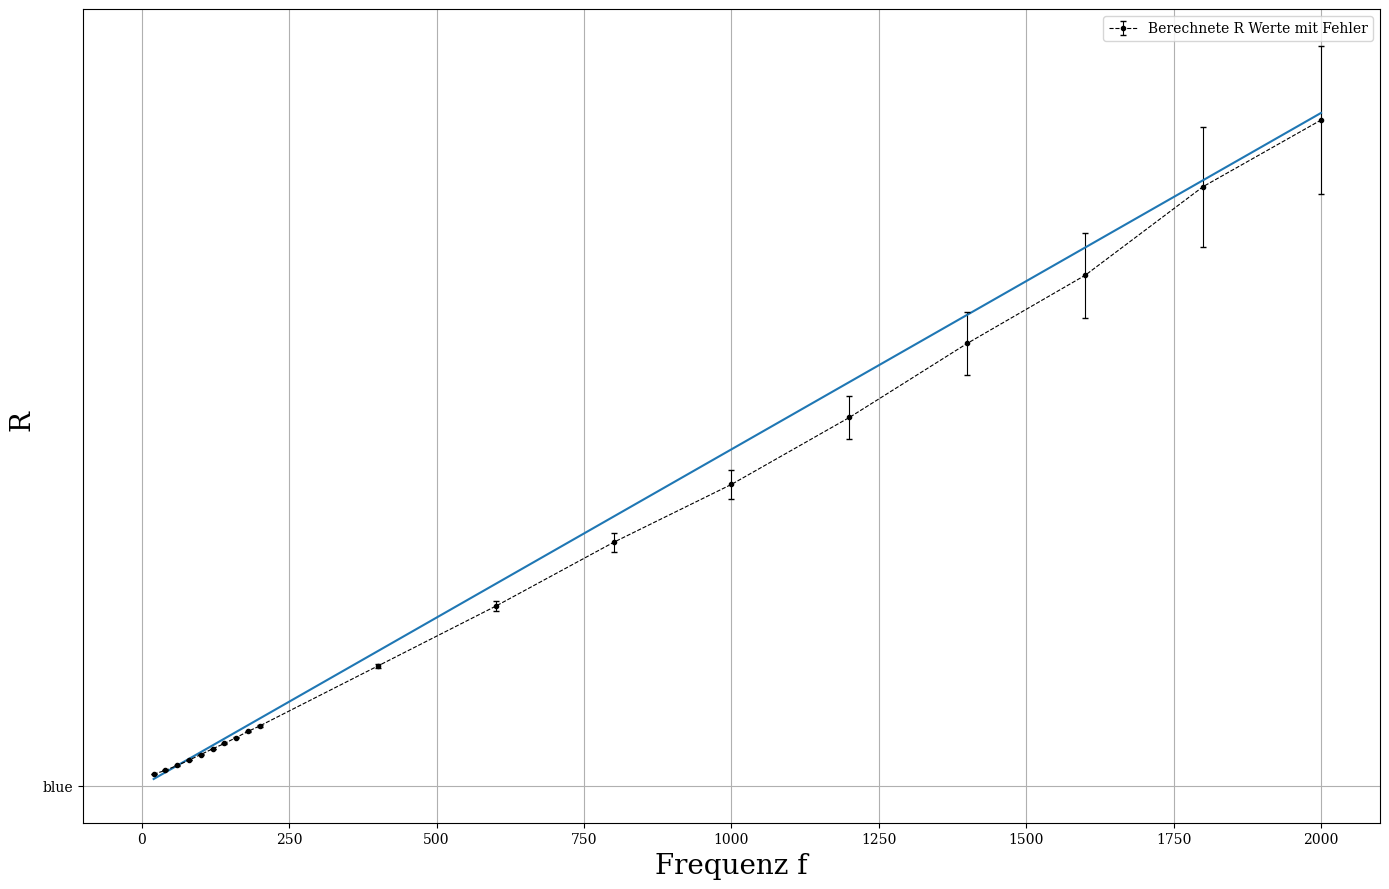

In [17]:
#Induktivität bestimmen 
R = Uh/Ih
d_R = np.sqrt((d_Uh/Ih)**2+(Uh*d_Ih/(Ih**2))**2)

#fit linear
p3, c3 = curve_fit(linear2, freq2, R, sigma=d_R)
p3_err = np.sqrt(np.diag(c3))

plt.plot(freq2, linear2(freq2, p3), '-', 'blue')
plt.errorbar(freq2, R,yerr=d_R, linewidth=0.8, color='black', marker='.', linestyle='--', label='Berechnete R Werte mit Fehler' )
plt.ylabel('R ', size=20)
plt.xlabel('Frequenz f', size=20)
plt.grid()
plt.legend()
plt.tight_layout()
plt.savefig('induktivität.pdf', format='PDF')
print('a: ', p3[0], 'err:', p3_err[0])

def L(a):
    return (a/(2 * np.pi))
print('L: ', L(p3[0]), '+-', L(p3_err[6]))

In [18]:
#Erdmagentfeld
import math
Be = 66e-3 /(A *N *2 *math.pi *11.73)
d_Be = math.sqrt((2e-3/(A *N *2 *math.pi *11.73))**2 + (66e-3 * 0.2/(A *N *2 *math.pi *11.73**2))**2)
print('Be', Be, '+-', d_Be)

Be 5.368710782813694e-05 +- 1.8667265406262284e-06


In [19]:
#Erdmagnetfeld mit Kompensation
Bvert = 45e-3 /(A *N *2 *math.pi *22)
Bvert_error = Bvert*0.1/58
Bhor = (4/5)**(3/2) * mü * n * 58e-3**2/45e-3
Bhor_error = np.sqrt((Bhor*2/45)**2+(Bhor/22)**2) 
w = math.asin(Bvert/Be)

print('Bvert: ', Bvert, 'Bhor: ', Bhor,'Bvert_error: ', Bvert_error, 'Bhor_error: ', Bhor_error, 'omega:', w * 360/(2 * np.pi))

Bvert:  1.9517038475951845e-05 Bhor:  8.335084428067816e-06 Bvert_error:  3.365006633784801e-08 Bhor_error:  5.298796366837294e-07 omega: 19.97787863135206
